In [1]:
#!pip install xgboost

In [2]:
#Importing Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SMOTE to balance the Imbalance Data

from imblearn.over_sampling import SMOTE

#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split, GridSearchCV


from xgboost import XGBClassifier, XGBRFClassifier


#To tranform data
from sklearn import preprocessing

#statistical Tools
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

#Setting Format
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("C:\\Users\\DEV\\Downloads\\archive (14)\\train.csv")
test = pd.read_csv("C:\\Users\\DEV\\Downloads\\archive (14)\\test.csv")

In [4]:
test.shape,train.shape

((112392, 40), (233154, 41))

In [5]:
#Replacing all the Spaces with '_'
train.columns = train.columns.str.replace('.','_')

In [6]:
train.isna().sum()

#So only Employment Type data is missing

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

<AxesSubplot:>

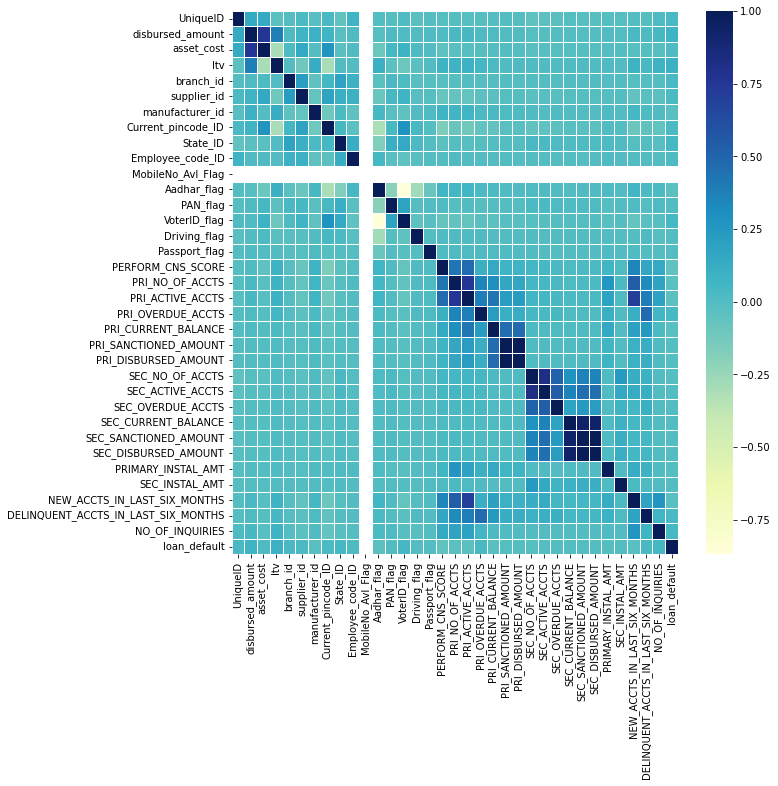

In [7]:
#Data Correlation
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), linewidths=.5, cmap="YlGnBu")

# Dropping Unneccesary Columns

In [8]:
columns_unique = ['UniqueID','MobileNo_Avl_Flag',
         'Current_pincode_ID','Employee_code_ID',
         'NO_OF_INQUIRIES','State_ID',
         'branch_id','manufacturer_id','supplier_id']

unique_col = train[columns_unique]

In [9]:
def columns_drop(data):
    data.drop(unique_col,axis=1,inplace=True)

In [10]:
columns_drop(train)

In [11]:
train.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default
0,50578,58400,89.55000,01-01-84,Salaried,03-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,47145,65550,73.23000,31-07-85,Self employed,26-09-18,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,1
2,53278,61360,89.63000,24-08-85,Self employed,01-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,57513,66113,88.48000,30-12-93,Self employed,26-10-18,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1
4,52378,60300,88.39000,09-12-77,Self employed,26-09-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1


# Data Preprocessing & Transformation

### Changing Year and Month Field to Numerical format

In [12]:
def change_col_month(col):
    year = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return year*12+month

def months_transformation(data):
    data['CREDIT_HISTORY_LENGTH'] = data['CREDIT_HISTORY_LENGTH'].apply(change_col_month)
    data['AVERAGE_ACCT_AGE'] = data['AVERAGE_ACCT_AGE'].apply(change_col_month)

In [13]:
months_transformation(train)

In [14]:
train.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default
0,50578,58400,89.55000,01-01-84,Salaried,03-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23000,31-07-85,Self employed,26-09-18,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,1
2,53278,61360,89.63000,24-08-85,Self employed,01-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48000,30-12-93,Self employed,26-10-18,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1
4,52378,60300,88.39000,09-12-77,Self employed,26-09-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='AVERAGE_ACCT_AGE', ylabel='loan_default'>

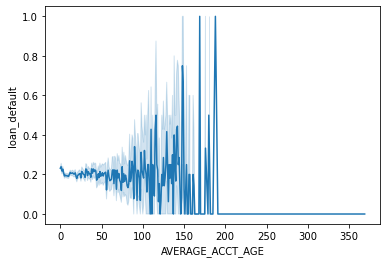

In [15]:
plot = train[train['AVERAGE_ACCT_AGE']<175]
sns.lineplot(x=train['AVERAGE_ACCT_AGE'],y=train['loan_default'])

<AxesSubplot:xlabel='CREDIT_HISTORY_LENGTH', ylabel='loan_default'>

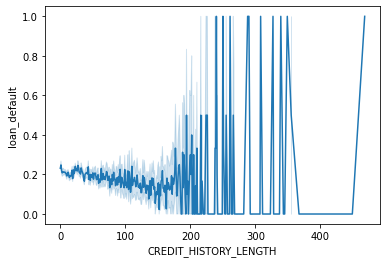

In [16]:
plot = train[train['CREDIT_HISTORY_LENGTH']<200]
sns.lineplot(x=train['CREDIT_HISTORY_LENGTH'],y=train['loan_default'])

### Now Transform CNS Score Description data into Numbers

In [17]:
train.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [18]:
def CNS_Transform(n):
   
    score=n.split("-")
    
    if len(score)!=1:
        return score[0]
    else:
        return 'N'

def transform_CNS_Description(data):
    data['CNS_SCORE_DESCRIPTION']=data['PERFORM_CNS_SCORE_DESCRIPTION'].apply(CNS_Transform).astype(np.object)

    sub_risk = {'N':-1, 'K':0, 'J':1, 'I':2, 'H':3, 'G':4, 'E':5,'F':6, 'L':7, 'M':8, 'B':9, 'D':10, 'A':11, 'C':12}

    data['CNS_SCORE_DESCRIPTION'] = data['CNS_SCORE_DESCRIPTION'].apply(lambda x: sub_risk[x])
    
transform_CNS_Description(train)

In [19]:
train.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default,CNS_SCORE_DESCRIPTION
0,50578,58400,89.55000,01-01-84,Salaried,03-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
1,47145,65550,73.23000,31-07-85,Self employed,26-09-18,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,1,2
2,53278,61360,89.63000,24-08-85,Self employed,01-08-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
3,57513,66113,88.48000,30-12-93,Self employed,26-10-18,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,7
4,52378,60300,88.39000,09-12-77,Self employed,26-09-18,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1


In [20]:
def CNS_Desc_Transform(data):
    #Replacing all the values into Common Group

    data['PERFORM_CNS_SCORE_DESCRIPTION'].replace({'C-Very Low Risk':'Very Low Risk',
                                                 'A-Very Low Risk':'Very Low Risk',
                                                 'D-Very Low Risk':'Very Low Risk',
                                                 'B-Very Low Risk':'Very Low Risk',
                                                 'M-Very High Risk':'Very High Risk',
                                                 'L-Very High Risk':'Very High Risk',
                                                 'F-Low Risk':'Low Risk',
                                                 'E-Low Risk':'Low Risk',
                                                 'G-Low Risk':'Low Risk',
                                                 'H-Medium Risk':'Medium Risk',
                                                 'I-Medium Risk':'Medium Risk',
                                                 'J-High Risk':'High Risk',
                                                 'K-High Risk':'High Risk'},
                                                  inplace=True)

    #Transformin them into Numeric Features

    risk_map = {'No Bureau History Available':-1, 
                  'Not Scored: No Activity seen on the customer (Inactive)':-1,
                  'Not Scored: Sufficient History Not Available':-1,
                  'Not Scored: No Updates available in last 36 months':-1,
                  'Not Scored: Only a Guarantor':-1,
                  'Not Scored: More than 50 active Accounts found':-1,
                  'Not Scored: Not Enough Info available on the customer':-1,
                  'Very Low Risk':4,
                  'Low Risk':3,
                  'Medium Risk':2, 
                  'High Risk':1,
                  'Very High Risk':0}

    data['PERFORM_CNS_SCORE_DESCRIPTION'] = data['PERFORM_CNS_SCORE_DESCRIPTION'].map(risk_map)

CNS_Desc_Transform(train)

In [21]:
train.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default,CNS_SCORE_DESCRIPTION
0,50578,58400,89.55000,01-01-84,Salaried,03-08-18,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
1,47145,65550,73.23000,31-07-85,Self employed,26-09-18,1,0,0,0,0,598,2,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,1,2
2,53278,61360,89.63000,24-08-85,Self employed,01-08-18,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
3,57513,66113,88.48000,30-12-93,Self employed,26-10-18,1,0,0,0,0,305,0,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,7
4,52378,60300,88.39000,09-12-77,Self employed,26-09-18,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1


<AxesSubplot:xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

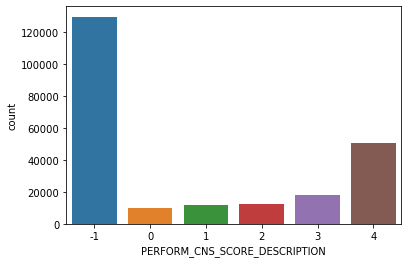

In [22]:
sns.countplot(x = train['PERFORM_CNS_SCORE_DESCRIPTION'])

# Treating Missing Values

In [23]:
train.Employment_Type.value_counts()

Self employed    127635
Salaried          97858
Name: Employment_Type, dtype: int64

In [24]:
defa = pd.crosstab(train['Employment_Type'], train['loan_default'])
print(defa)

loan_default         0      1
Employment_Type              
Salaried         77948  19910
Self employed    98578  29057


In [25]:
def EmploymentTypeTransform(data):
    data['Employment_Type'] = data['Employment_Type'].fillna('Salaried')
    employment_map = {'Self employed':0, 'Salaried':1, 'Not_employed':-1}

    data['Employment_Type'] = data['Employment_Type'].apply(lambda x: employment_map[x])
EmploymentTypeTransform(train)

In [26]:
import scipy.stats as stats
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(defa)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

Chi Square Statistics 190.6579236758318
p-value 2.2841351170641894e-43
Degree of freedom 1


<AxesSubplot:xlabel='Employment_Type', ylabel='count'>

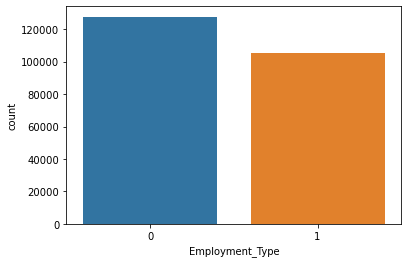

In [27]:
sns.countplot(x = train['Employment_Type'])

# Transforming Primary and Secondary Accounts

In [28]:
ColsToBeJoined = ['PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS',
           'PRI_ACTIVE_ACCTS','SEC_ACTIVE_ACCTS',
           'PRI_OVERDUE_ACCTS','SEC_OVERDUE_ACCTS',
           'PRI_CURRENT_BALANCE','SEC_CURRENT_BALANCE',
           'PRI_SANCTIONED_AMOUNT','SEC_SANCTIONED_AMOUNT',
           'PRI_DISBURSED_AMOUNT','SEC_DISBURSED_AMOUNT',
           'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT']

pri_df = train[ColsToBeJoined]

In [29]:
def CombinColumns(data):
    #Creating and Sorting Columns

    data['NO_OF_ACCTS'] = data['PRI_NO_OF_ACCTS'] + data['SEC_NO_OF_ACCTS']

    data['ACTIVE_ACCTS'] = data['PRI_ACTIVE_ACCTS'] + data['SEC_ACTIVE_ACCTS']

    data['OVERDUE_ACCTS'] = data['PRI_OVERDUE_ACCTS'] + data['SEC_OVERDUE_ACCTS']

    data['CURRENT_BALANCE'] = data['PRI_CURRENT_BALANCE'] + data['SEC_CURRENT_BALANCE']

    data['SANCTIONED_AMOUNT'] = data['PRI_SANCTIONED_AMOUNT'] + data['SEC_SANCTIONED_AMOUNT']

    data['DISBURSED_AMOUNT'] = data['PRI_DISBURSED_AMOUNT'] + data['SEC_DISBURSED_AMOUNT']

    data['INSTAL_AMT'] = data['PRIMARY_INSTAL_AMT'] + data['SEC_SANCTIONED_AMOUNT']
    
    data.drop(ColsToBeJoined, axis=1, inplace=True)

CombinColumns(train)

# Removing Outliers from Numerical Fields

In [30]:
num_columns = ['NO_OF_ACCTS', 'ACTIVE_ACCTS', 'OVERDUE_ACCTS', 'CURRENT_BALANCE',
       'SANCTIONED_AMOUNT', 'DISBURSED_AMOUNT', 'INSTAL_AMT']

for i in num_columns:
    print(i)
    print(train[i].nunique()," : No. of unique Items")
    print("_"*30)
    print("")

NO_OF_ACCTS
108  : No. of unique Items
______________________________

ACTIVE_ACCTS
41  : No. of unique Items
______________________________

OVERDUE_ACCTS
22  : No. of unique Items
______________________________

CURRENT_BALANCE
72483  : No. of unique Items
______________________________

SANCTIONED_AMOUNT
45367  : No. of unique Items
______________________________

DISBURSED_AMOUNT
48958  : No. of unique Items
______________________________

INSTAL_AMT
30049  : No. of unique Items
______________________________



Text(0.5, 1.0, 'CURRENT_BALANCE')

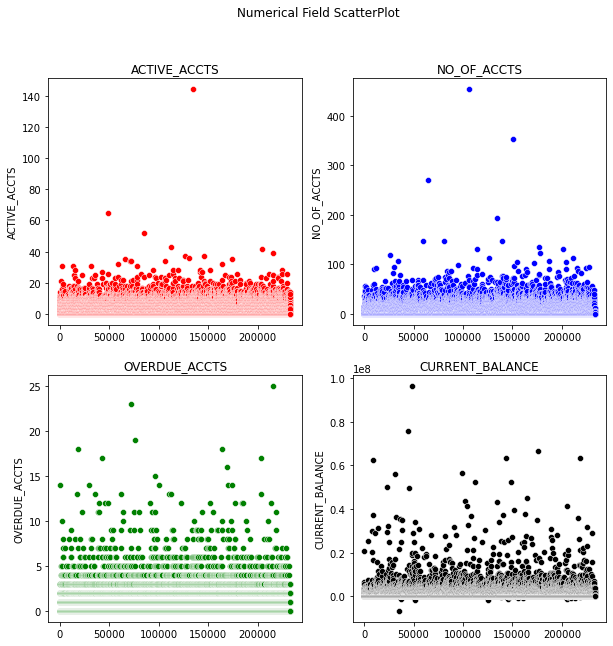

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

fig.suptitle('Numerical Field ScatterPlot') 
sns.scatterplot(ax=axes[0, 0],data=train['ACTIVE_ACCTS'], color = 'red') 
axes[0,0].set_title('ACTIVE_ACCTS')
sns.scatterplot(ax=axes[0, 1],data=train['NO_OF_ACCTS'], color ='blue') 
axes[0,1].set_title('NO_OF_ACCTS')
sns.scatterplot(ax=axes[1, 0],data=train['OVERDUE_ACCTS'], color='green') 
axes[1,0].set_title('OVERDUE_ACCTS')
sns.scatterplot(ax=axes[1, 1],data = train['CURRENT_BALANCE'], color='black')
axes[1,1].set_title('CURRENT_BALANCE')

### Removing Outlier which lie above the model value

In [32]:
def remove_outliers(data):
    li = list(data['ACTIVE_ACCTS'].sort_values()[-3:].index)
    data['ACTIVE_ACCTS'][li] = int(data.drop(li)['ACTIVE_ACCTS'].mode())
    li = list(data['NO_OF_ACCTS'].sort_values()[-4:].index)
    data['NO_OF_ACCTS'][li] = int(data.drop(li)['NO_OF_ACCTS'].mode())
    li = list(data['OVERDUE_ACCTS'].sort_values()[-10:].index)
    data['OVERDUE_ACCTS'][li] = int(data.drop(li)['OVERDUE_ACCTS'].mode())
    li = list(data['CURRENT_BALANCE'].sort_values()[-15:].index)
    data['CURRENT_BALANCE'][li] = int(data.drop(li)['CURRENT_BALANCE'].mode())

In [33]:
remove_outliers(train)

Text(0.5, 1.0, 'CURRENT_BALANCE')

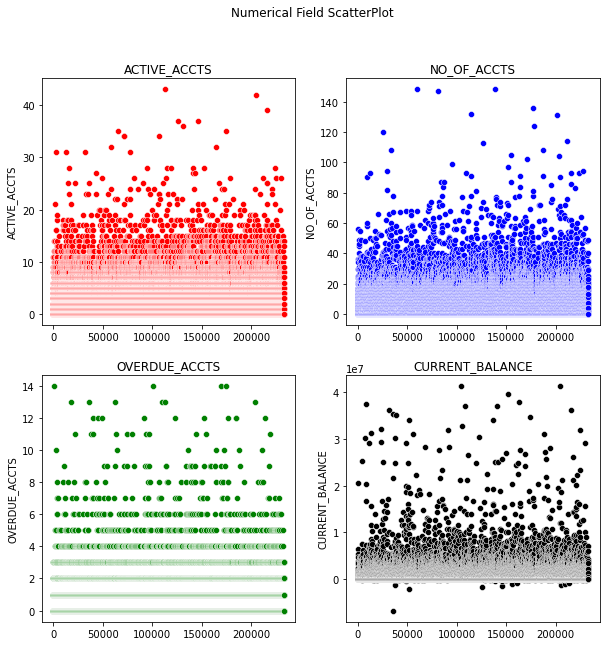

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

fig.suptitle('Numerical Field ScatterPlot') 
sns.scatterplot(ax=axes[0, 0],data=train['ACTIVE_ACCTS'], color = 'red') 
axes[0,0].set_title('ACTIVE_ACCTS')
sns.scatterplot(ax=axes[0, 1],data=train['NO_OF_ACCTS'], color ='blue') 
axes[0,1].set_title('NO_OF_ACCTS')
sns.scatterplot(ax=axes[1, 0],data=train['OVERDUE_ACCTS'], color='green') 
axes[1,0].set_title('OVERDUE_ACCTS')
sns.scatterplot(ax=axes[1, 1],data = train['CURRENT_BALANCE'], color='black')
axes[1,1].set_title('CURRENT_BALANCE')

In [35]:
train.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default,CNS_SCORE_DESCRIPTION,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT
0,50578,58400,89.55000,01-01-84,1,03-08-18,1,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,0,0,0
1,47145,65550,73.23000,31-07-85,0,26-09-18,1,0,0,0,0,598,2,0,1,23,23,1,2,1,1,1,27600,50200,50200,1991
2,53278,61360,89.63000,24-08-85,0,01-08-18,1,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,0,0,0
3,57513,66113,88.48000,30-12-93,0,26-10-18,1,0,0,0,0,305,0,0,0,8,15,1,7,3,0,0,0,0,0,31
4,52378,60300,88.39000,09-12-77,0,26-09-18,1,0,0,0,0,0,-1,0,0,0,0,1,-1,0,0,0,0,0,0,0


# Transformation on Date Field

In [36]:
df_age = train[['disbursed_amount', 'asset_cost', 'ltv', 'Date_of_Birth','DisbursalDate','loan_default']]

In [37]:
def age(dob):
    yr = int(dob[-2:])
    if yr >=0 and yr < 20:
        return yr + 2000
    else:
         return yr + 1900
        
df_age['Date_of_Birth'] = df_age['Date_of_Birth'].apply(age)
df_age['DisbursalDate'] = df_age['DisbursalDate'].apply(age)
df_age['Age']=df_age['DisbursalDate']-df_age['Date_of_Birth']
df_age=df_age.drop(['DisbursalDate','Date_of_Birth'],axis=1)

df_age.head()

,disbursed_amount,asset_cost,ltv,loan_default,Age
0,50578,58400,89.55000,0,34
1,47145,65550,73.23000,1,33
2,53278,61360,89.63000,0,33
3,57513,66113,88.48000,1,25
4,52378,60300,88.39000,1,41


In [38]:
def calculate_age(data):
    data['Date_of_Birth'] = data['Date_of_Birth'].apply(age)
    data['DisbursalDate'] = data['DisbursalDate'].apply(age)
    data['Age'] = data['DisbursalDate'] - data['Date_of_Birth']
    data = data.drop( ['DisbursalDate', 'Date_of_Birth'], axis=1)
    
calculate_age(train)

In [39]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.00000,54356.99353,12971.31417,13320.00000,47145.00000,53803.00000,60413.00000,990572.00000
asset_cost,233154.00000,75865.06814,18944.78129,37000.00000,65717.00000,70946.00000,79201.75000,1628992.00000
ltv,233154.00000,74.74653,11.45664,10.03000,68.88000,76.80000,83.67000,95.00000
Date_of_Birth,233154.00000,1983.89905,9.80599,1949.00000,1977.00000,1986.00000,1992.00000,2000.00000
Employment_Type,233154.00000,0.45257,0.49775,0.00000,0.00000,0.00000,1.00000,1.00000
DisbursalDate,233154.00000,2018.00000,0.00000,2018.00000,2018.00000,2018.00000,2018.00000,2018.00000
Aadhar_flag,233154.00000,0.84032,0.36631,0.00000,1.00000,1.00000,1.00000,1.00000
PAN_flag,233154.00000,0.07558,0.26432,0.00000,0.00000,0.00000,0.00000,1.00000
VoterID_flag,233154.00000,0.14494,0.35204,0.00000,0.00000,0.00000,0.00000,1.00000
Driving_flag,233154.00000,0.02324,0.15067,0.00000,0.00000,0.00000,0.00000,1.00000


In [40]:
train.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default,CNS_SCORE_DESCRIPTION,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT,Age
0,50578,58400,89.55000,1984,1,2018,1,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,0,0,0,34
1,47145,65550,73.23000,1985,0,2018,1,0,0,0,0,598,2,0,1,23,23,1,2,1,1,1,27600,50200,50200,1991,33
2,53278,61360,89.63000,1985,0,2018,1,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,0,0,0,33
3,57513,66113,88.48000,1993,0,2018,1,0,0,0,0,305,0,0,0,8,15,1,7,3,0,0,0,0,0,31,25
4,52378,60300,88.39000,1977,0,2018,1,0,0,0,0,0,-1,0,0,0,0,1,-1,0,0,0,0,0,0,0,41


In [41]:
transformed = []
transformed_with_one = []
not_transformed = []

def column_to_transform(data):

    num_col = ['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS_SCORE',
            'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH',
           'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
           'NO_OF_ACCTS', 'ACTIVE_ACCTS', 'OVERDUE_ACCTS', 'CURRENT_BALANCE',
           'SANCTIONED_AMOUNT', 'DISBURSED_AMOUNT', 'INSTAL_AMT', 'Age']
    
    num_col_data = data[num_col]
    
    def boxcox_transformation(num_col_data):
    
        from scipy.stats import boxcox

        for i in num_col:
            if num_col_data[i].min() > 0:
                num_col_data[i] = boxcox(num_col_data[i])[0]
                transformed.append(i)
            elif num_col_data[i].min() == 0:
                num_col_data[i] = boxcox(num_col_data[i]+1)[0]
                transformed_with_one.append(i)
            else:
                num_col_data[i] = num_col_data[i]
                not_transformed.append(i)
        print("Successful")
    
    boxcox_transformation(data)

column_to_transform(train)

Successful


### Standard Distribution on Numerical Fields

Text(0, 0.5, 'Assest Cost')

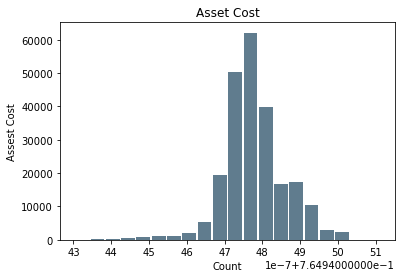

In [42]:
plt.hist(train['asset_cost'], bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Asset Cost')
plt.xlabel('Count')
plt.ylabel('Assest Cost')

In [43]:
def data_processing(data):
    test.columns = test.columns.str.replace('.','_')
    columns_drop(data)
    months_transformation(data)
    transform_CNS_Description(data)
    CNS_Desc_Transform(data)
    EmploymentTypeTransform(data)
    CombinColumns(data)
    remove_outliers(data)
    calculate_age(data)
    column_to_transform(data)
    preprocessing.RobustScaler()
    scaler.transform(data)
    return data.shape

<AxesSubplot:xlabel='loan_default', ylabel='count'>

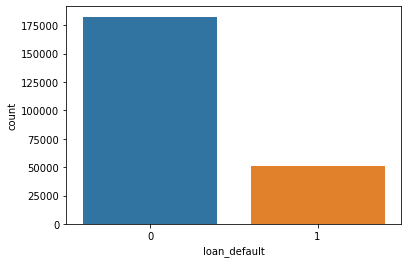

In [44]:
sns.countplot(x = train['loan_default'])

In [45]:
X = train.drop(['loan_default'], axis=1)
y = train['loan_default']

In [46]:
X.head()

,disbursed_amount,asset_cost,ltv,Date_of_Birth,Employment_Type,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,CNS_SCORE_DESCRIPTION,NO_OF_ACCTS,ACTIVE_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT,Age
0,104.26117,0.76494,662254.26844,1984,1,2018,1,0,0,0,0,0.00000,-1,0.00000,0.00000,0.00000,0.00000,-1,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,2.23053
1,101.80791,0.76494,344821.24284,1985,0,2018,1,0,0,0,0,5.26245,2,0.00000,0.06112,2.06063,2.19300,2,0.54343,0.46091,0.09710,27600,6.63106,6.59978,3.34517,2.21949
2,106.11323,0.76494,664175.30815,1985,0,2018,1,0,0,0,0,0.00000,-1,0.00000,0.00000,0.00000,0.00000,-1,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,2.21949
3,108.89531,0.76494,636928.47801,1993,0,2018,1,0,0,0,0,4.80413,0,0.00000,0.00000,1.61596,2.00017,7,0.87036,0.00000,0.00000,0,0.00000,0.00000,2.29674,2.11216
4,105.50302,0.76494,634829.32372,1977,0,2018,1,0,0,0,0,0.00000,-1,0.00000,0.00000,0.00000,0.00000,-1,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,2.29772


In [47]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: loan_default, dtype: int64

# SMOTE for Balancing Unbalanced Dataset

In [48]:
smote = SMOTE()
X_tf,y_tf = smote.fit_resample(X,y)
X_tf.shape, y_tf.shape

((365086, 26), (365086,))

<AxesSubplot:xlabel='loan_default', ylabel='count'>

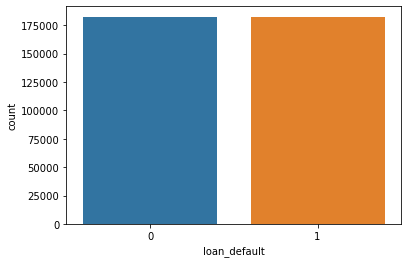

In [49]:
sns.countplot(x = y_tf)

# Splitting Data in Train and Test

In [65]:
scaler = preprocessing.RobustScaler()
X_tf = scaler.fit_transform(X_tf)

x_train,x_test,y_train,y_test = train_test_split(X_tf,y_tf,test_size = .2, random_state = 3300)
print("Train Data Shape:")
print(x_train.shape[0]) 
print("Test Data Shape:")
print( x_test.shape[0])

Train Data Shape:
292068
Test Data Shape:
73018


# Model Building and Evaluation

In [51]:
accuracy = {}
roc_r = {}

def train_model(model, model_name):
    print(model_name)
    
    # Fitting model
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    #Model accuracy
    acc = accuracy_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('accuracy_score',acc)
    print('precision_score',precision_score(y_test, pred)*100)
    print('recall_score',recall_score(y_test, pred)*100)
    print('f1_score',f1_score(y_test, pred)*100)
    
    
    #ROC Score
    roc_score = roc_auc_score(y_test, pred)*100
    roc_r[model_name] = roc_score
    print('roc_auc_score',roc_score)
    
    # Confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    
    #ROC Score
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)*100
    
    #ROC Plot
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [52]:
#x_train,x_test,y_train,y_test 
import xgboost as xgb 
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [53]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

NameError: name 'hp' is not defined

In [ ]:
# import packages for hyperparameters tuning
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe        
#trials = Trials()

#best_hyperparams = fmin(fn = objective,
                       # space = space,
                       # algo = tpe.suggest,
                        #max_evals = 100,
                        #trials = trials)

### The best hyperparameters are :  

{'colsample_bytree': 0.6138485378068922, 'gamma': 3.8599840899410367, 'max_depth': 12.0, 'min_child_weight': 7.0,  
 'reg_alpha': 46.0, 'reg_lambda': 0.5441122630750208}

XGBClassifier
accuracy_score 83.7108658139089
precision_score 90.76370648668419
recall_score 74.96636001647673
f1_score 82.11213379053119
roc_auc_score 83.68840908782201
confusion_matrix
       0      1
0  33825   2778
1   9116  27299


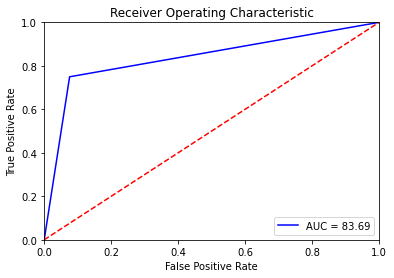

In [58]:
xgb = XGBClassifier(n_estimators = 1500, seed=7,  nthread  = 4, max_depth = 12, min_child_weight = 7)

train_model(xgb, 'XGBClassifier')

In [59]:
y_head_xgb = xgb.predict(x_test)

In [60]:
cm_xgb = confusion_matrix(y_test,y_head_xgb) 
cm_xgb

array([[33825,  2778],
       [ 9116, 27299]], dtype=int64)

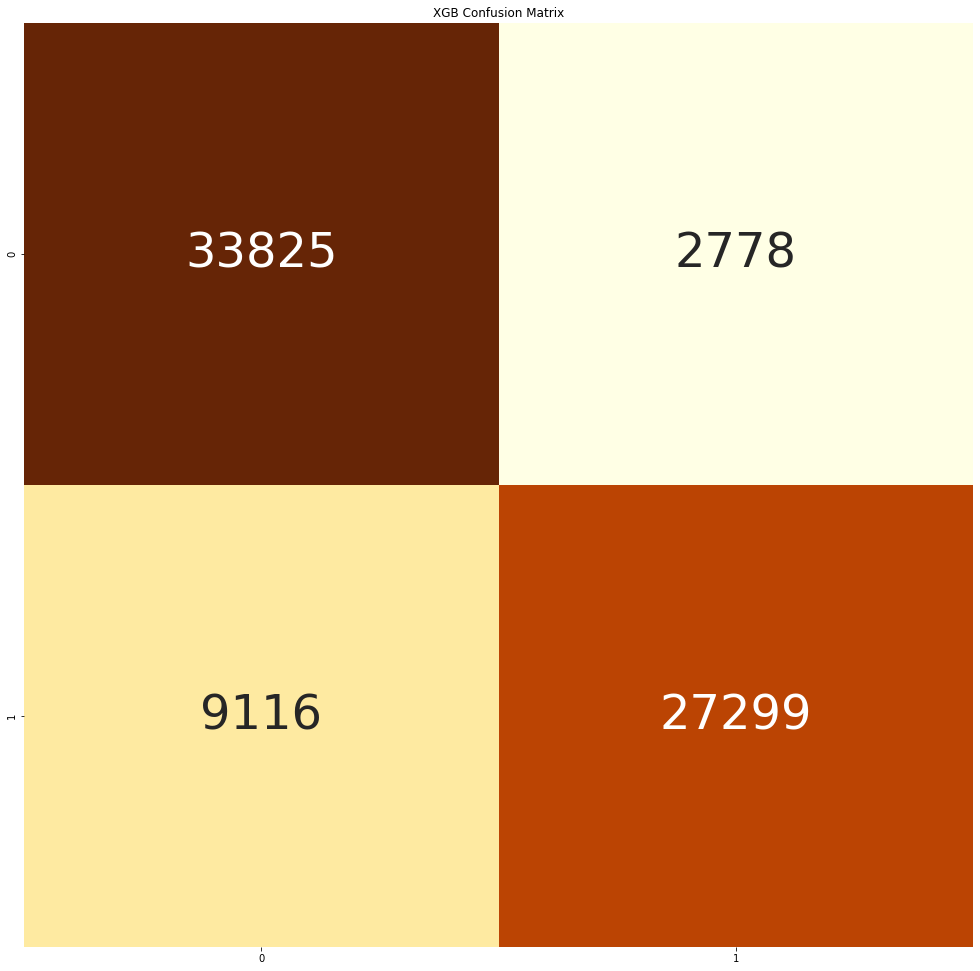

In [63]:
plt.figure(figsize=(17,17))
plt.title("Confusion Matrixes",fontsize=48)
plt.title("XGB Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="YlOrBr",fmt="d",cbar=False, annot_kws={"size": 48})
plt.show()